# Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../claims_train.csv')

df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 49.7+ MB


# Cleaning

In [81]:
dirty_df = df.copy()

dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 49.7+ MB


### Check ID is unique

In [83]:
len(dirty_df) == len(dirty_df['IDpol'].unique())

True

### Remove data entry errors

In [ ]:
# all categorical values look fine
sorted(dirty_df['Region'].unique())
sorted(dirty_df['VehGas'].unique())
sorted(dirty_df['VehBrand'].unique())
sorted(dirty_df['Area'].unique())

['A', 'B', 'C', 'D', 'E', 'F']

In [103]:
# there does not seem to be any unrealistic values
dirty_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,5.424100e+05,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000
mean,2.623260e+06,0.053122,0.528840,6.453281,7.045768,45.503164,59.761546,1796.176180
std,1.641809e+06,0.238785,0.364463,2.050506,5.660827,14.135435,15.639321,3965.475251
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.158401e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272434e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046606e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1662.000000
max,6.114330e+06,11.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


### Check for missing values

In [ ]:
# There is not a single missing value in the dataset
dirty_df.isnull().any(axis=1).sum()

np.int64(0)

### Check cardinality of categorical features

In [130]:
print(len(dirty_df['Region'].unique()))
print(len(dirty_df['VehGas'].unique()))
print(len(dirty_df['VehBrand'].unique()))
print(len(dirty_df['Area'].unique()))

22
2
11
6


## Summary

The dataset is already clean

# Exploring

In [134]:
clean_df = df.copy()

### Distribution of numeric features

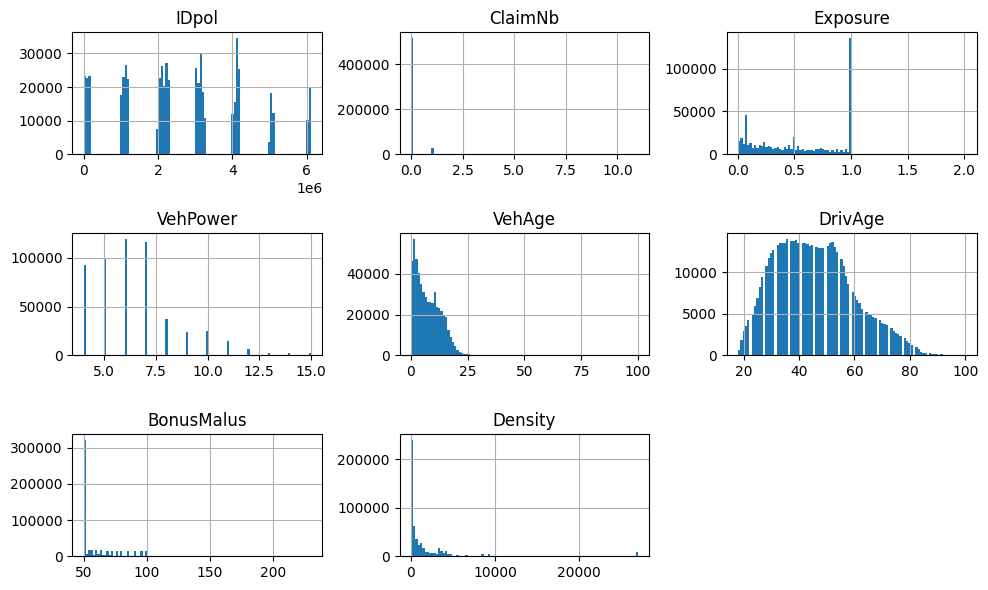

In [143]:
df.hist(bins=100, figsize=(10, 6))

plt.tight_layout()

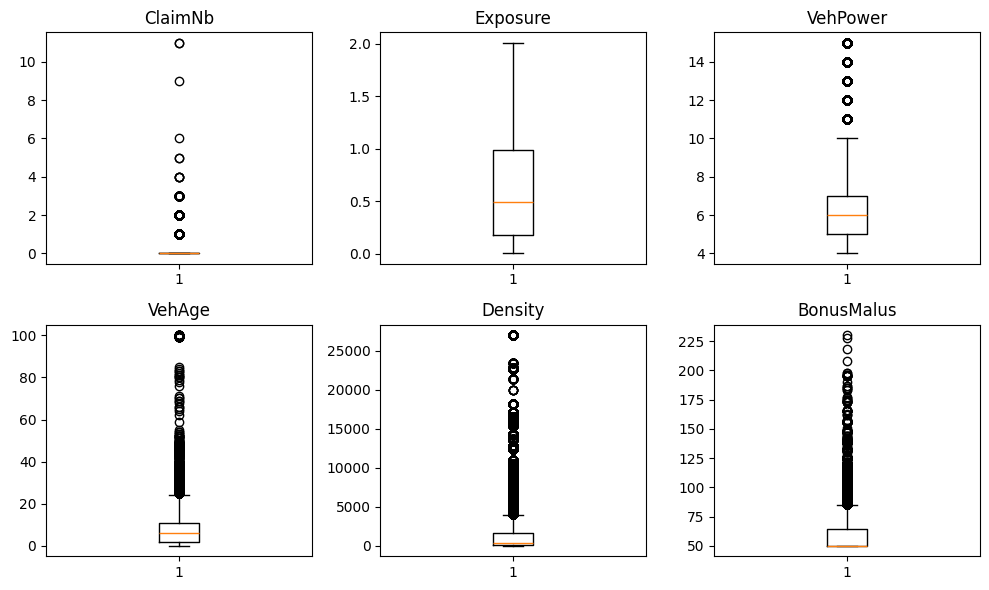

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

ax[0,0].set_title(f'ClaimNb')
ax[0,0].boxplot(clean_df['ClaimNb'])

ax[0,1].set_title('Exposure')
ax[0,1].boxplot(clean_df['Exposure'])

ax[0,2].set_title('VehPower')
ax[0,2].boxplot(clean_df['VehPower'])

ax[1,0].set_title('VehAge')
ax[1,0].boxplot(clean_df['VehAge'])

ax[1,1].set_title('Density')
ax[1,1].boxplot(clean_df['Density'])

ax[1,2].set_title('BonusMalus')
ax[1,2].boxplot(clean_df['BonusMalus'])

plt.tight_layout()
plt.show()

# Target variable

## Exposure time is short and therefore uncertain

- 18% of the data is in the first quartile

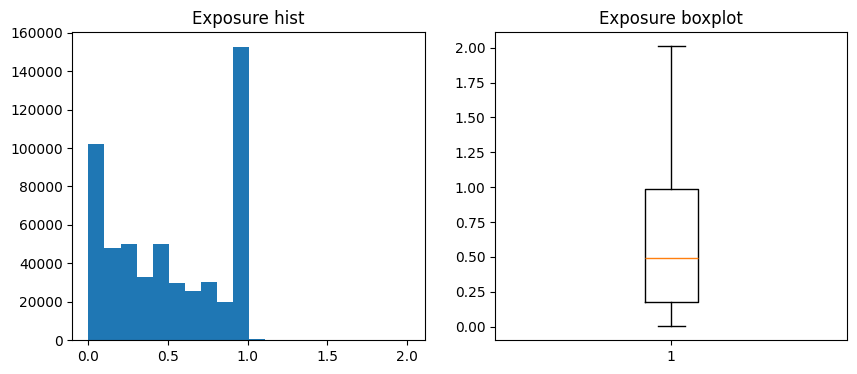

count    542410.000000
mean          0.528840
std           0.364463
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64


In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].set_title('Exposure hist')
ax[0].hist(df['Exposure'], bins=20)

ax[1].set_title('Exposure boxplot')
ax[1].boxplot(df['Exposure'])

plt.show()

print(df['Exposure'].describe())

## Claims per year is a bad metric

In [132]:
df1 = df.copy()

- Distribution of claims per year of short term policies vs long term

In [ ]:
df1['ClaimNb'].unique()

array([ 0,  1,  2,  3,  4,  6, 11,  5,  9])

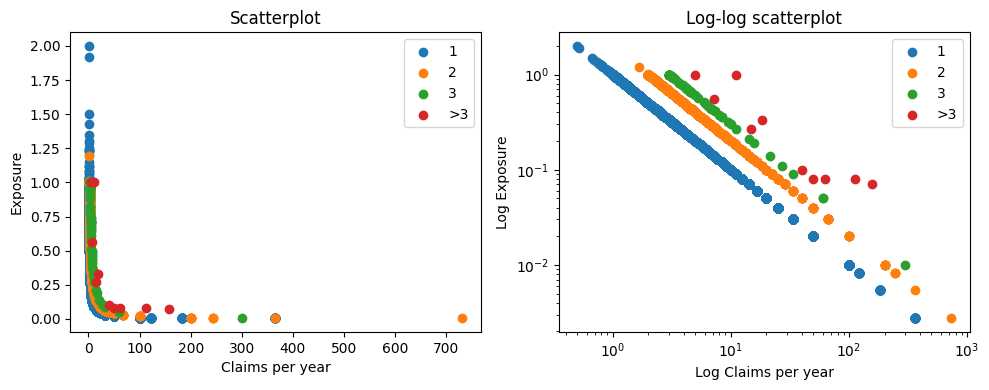

In [77]:
import matplotlib.cm as cm

cmap = cm.tab10
colors = [cmap(i) for i in range(5)]
labels = ['0', '1', '2', '3', '>3']

fig, ax = plt.subplots(1, 2, figsize=(10,4))

for cat in [1, 2, 3, 4]:
  mask = df1['ClaimNb_cat'] == cat
  ax[0].scatter(df1.loc[mask, 'cpy'], df1.loc[mask, 'Exposure'], label=labels[cat])
ax[0].set_title('Scatterplot')
ax[0].set_xlabel('Claims per year')
ax[0].set_ylabel('Exposure')
ax[0].legend()

for cat in [1, 2, 3, 4]:
  mask = df1['ClaimNb_cat'] == cat
  ax[1].scatter(df1.loc[mask, 'cpy'], df1.loc[mask, 'Exposure'], label=labels[cat])
ax[1].set_title('Log-log scatterplot')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Log Claims per year')
ax[1].set_ylabel('Log Exposure')
ax[1].legend()

plt.tight_layout()
plt.show()